<a href="https://colab.research.google.com/github/Ankushsb62/OASIS-INFOBYTE-DATA-SCIENCE/blob/PROJECT-5/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
#We can drop Unnamed:0 feature as it's not that important for our datset
df.drop('Unnamed: 0',axis=1,inplace=True)

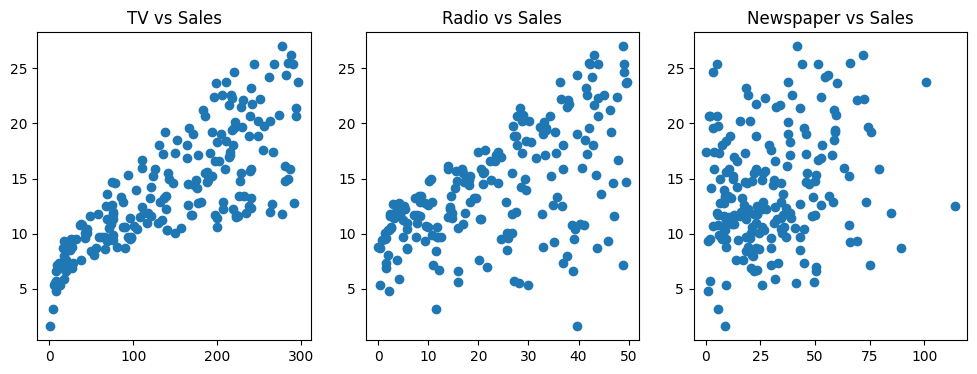

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV vs Sales')
plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio vs Sales')
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper vs Sales')
plt.show()

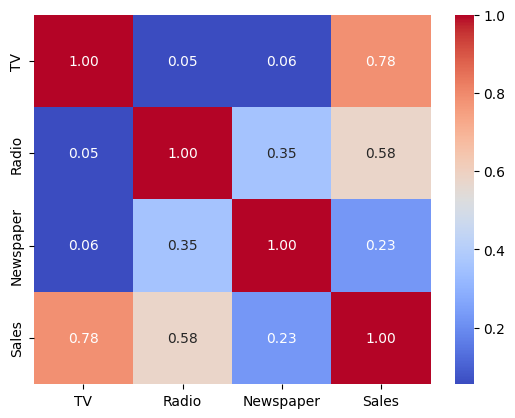

In [13]:
#Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

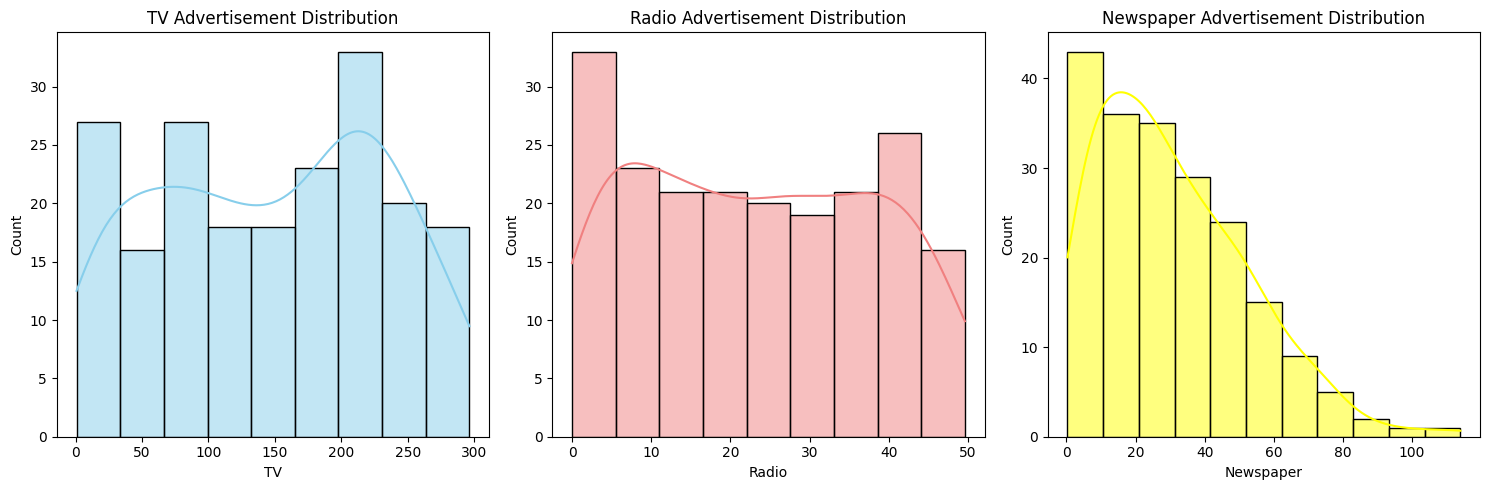

In [14]:
#Histplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='skyblue')
plt.title('TV Advertisement Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='lightcoral')
plt.title('Radio Advertisement Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='yellow')
plt.title('Newspaper Advertisement Distribution')
plt.tight_layout()
plt.show()

In [15]:
#Split the dataset
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [17]:
#Spliting into training and testig part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Train a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

In [19]:
#Evaluate Linear Regression Model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression:")
print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')

Linear Regression:
Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


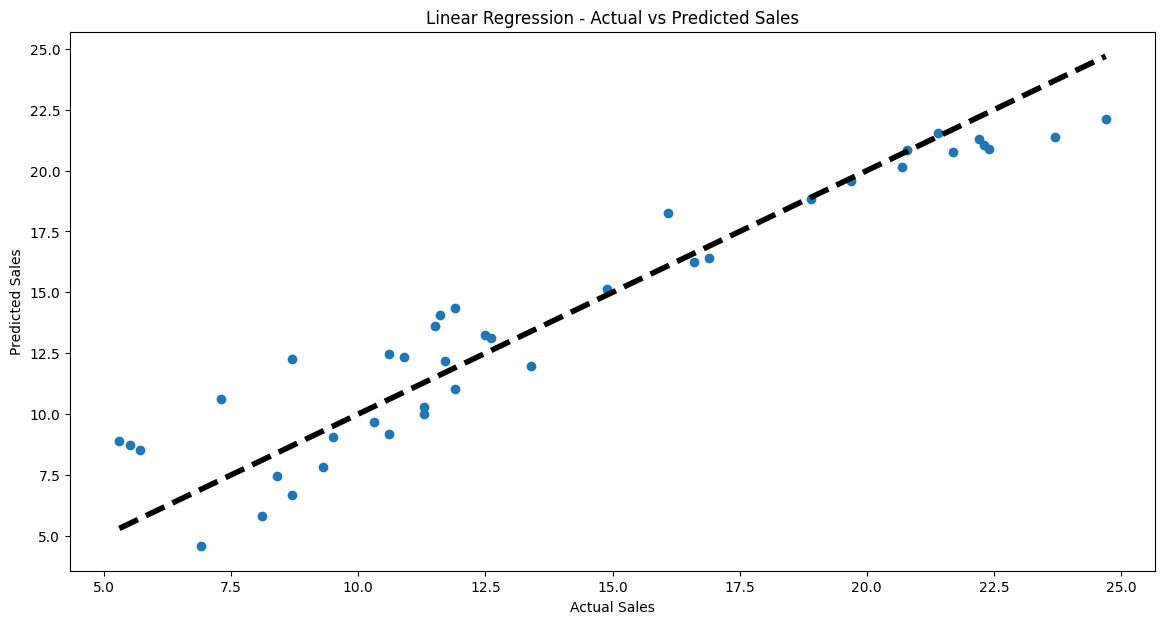

In [24]:
# Scatter plot of actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.scatter(y_test, linear_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Linear Regression - Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()